## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [94]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [95]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [96]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [98]:
# Categories of 'supp'. 
df.supp.unique()

array(['VC', 'OJ'], dtype=object)

In [99]:
# Group by category.
df.groupby("supp").mean()

,len,dose
supp,,
OJ,20.663333,1.166667
VC,16.963333,1.166667


<AxesSubplot:xlabel='dose', ylabel='len'>

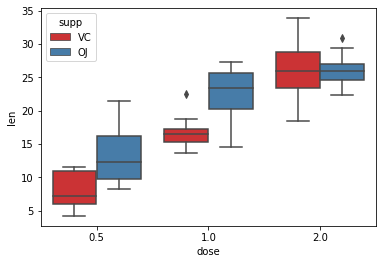

In [100]:
# Multiple Boxplots.
import seaborn as sns
sns.boxplot(x="dose", y="len", hue="supp",data=df, palette="Set1")


<AxesSubplot:xlabel='supp', ylabel='len'>

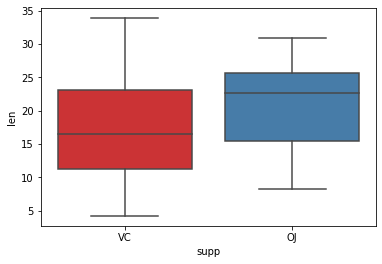

In [101]:
sns.boxplot(x="supp", y="len",data=df, palette="Set1")

In [123]:
# ANOVA.


st.f_oneway(df[df.supp=='VC'].dose,df[df.supp=='OJ'].dose)



F_onewayResult(statistic=4.80007774025107e-31, pvalue=1.0)

(dose)
Result summary. <br>
H0 : the means of VC and OJ are equal <br>
H1 : the're not<br>
p_value == 1 we can say that we are sure H0 is true

In [124]:
st.f_oneway(df[df.supp=='VC'].len,df[df.supp=='OJ'].len)


F_onewayResult(statistic=3.6682525410709697, pvalue=0.060393371224128745)

(len)
Result summary. <br>
H0 : the means of VC and OJ are equal <br>
H1 : the're not<br>
p_value >0.05 we don't have sufficient evidence to reject H0

2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [103]:
# Categories of 'dose'. 
df.dose.unique()

array([0.5, 1. , 2. ])

In [104]:
# Group by category.
df.groupby("dose").mean()

,len
dose,
0.5,10.605
1.0,19.735
2.0,26.100


<AxesSubplot:xlabel='dose', ylabel='len'>

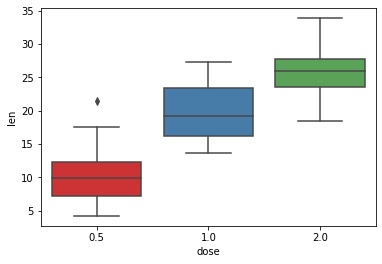

In [105]:
# Multiple Boxplots.
sns.boxplot(x="dose", y="len",data=df, palette="Set1")

In [121]:
#Anova 
st.f_oneway(df[df.dose==0.5].len,df[df.dose==1].len,df[df.dose==2].len)



F_onewayResult(statistic=67.41573785674247, pvalue=9.532727011699946e-16)

Result summary.
H0  :  means height of doses are equal
H1  : not H0

p_value < 0.05 
we reject H0 